# Extracting AOD Data for each location (C:/SushrutK\AOD_Extracted_Values27.csv)

In [1]:
import os
import rasterio
import pandas as pd
from rasterio.warp import transform
from glob import glob

# Base Directory
base_dir = "C:/SushrutK"
years = ["2020", "2021", "2022", "2023", "2024"]

# Sampling Locations (Geographic CRS: EPSG:4326)
locations = {
    "Bollaram_Industrial Area": (78.358528, 17.540891),
    "Hyderabad Central University": (78.334361, 17.460103),
    "US Consulate": (78.3310916, 17.4248562),
    "ICRISAT": (78.278777, 17.518400),
    "Kokapet": (78.339194, 17.393559),
    "Sanathnagar": (78.4439295, 17.4562544),
    "Somajiguda": (78.457437, 17.417094),
    "Zoo Park, Bahadurpura West": (78.451437, 17.349694),
    "New Malkapet": (78.50864, 17.37206),
    "IIT, Hyderabad": (78.126199, 17.585705),
    "Nacharam TSIIC-IALA": (78.569354, 17.429398),
    "ECII- Kapra, Hyderabad": (78.566959, 17.470431),
    "Komapally Municipal Office": (78.486949, 17.544899),
    "Ramachandrapuram": (78.286195, 17.528544),
    "Pashamylaram": (78.218939, 17.5316895),
}

# Initialize dictionary to store data
data_dict = {}

# Process Each Year
for year in years:
    input_folder = os.path.join(base_dir, year, "Processed_GapFilled_AOD")
    tiff_files = sorted(glob(os.path.join(input_folder, "GapFilled_AOD_*.tif")))

    for tiff in tiff_files:
        # Extract date from filename
        date_str = os.path.basename(tiff).split("_")[-1].split(".tif")[0]  # Extract YYYYDDD

        with rasterio.open(tiff) as src:
            raster_crs = src.crs  # Get raster CRS

            # Convert Geographic Coordinates to Raster CRS
            lons, lats = zip(*locations.values())
            utm_x, utm_y = transform("EPSG:4326", raster_crs.to_string(), lons, lats)

            # Initialize data for this date if not already present
            if date_str not in data_dict:
                data_dict[date_str] = {loc: None for loc in locations.keys()}

            # Extract AOD Values
            for loc_name, x, y in zip(locations.keys(), utm_x, utm_y):
                try:
                    row, col = src.index(x, y)  # Get row and col indices
                    aod_value = src.read(1)[row, col]  # Read AOD Value
                except IndexError:
                    aod_value = None  # If outside bounds

                # Store the AOD value for this location and date
                data_dict[date_str][loc_name] = aod_value

# Create DataFrame from extracted data
dates = sorted(data_dict.keys())
columns = ["Date"] + list(locations.keys())
formatted_data = pd.DataFrame(columns=columns)

for date in dates:
    row = {"Date": date}
    row.update(data_dict[date])
    formatted_data = pd.concat([formatted_data, pd.DataFrame([row])], ignore_index=True)

# Save DataFrame to CSV
output_csv_path = os.path.join(base_dir, "AOD_Extracted_Values27.csv")
os.makedirs(base_dir, exist_ok=True)
formatted_data.to_csv(output_csv_path, index=False)

print(f"✅ AOD values saved to: {output_csv_path}")

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5732\3904683077.py:72: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  formatted_data = pd.concat([formatted_data, pd.DataFrame([row])], ignore_index=True)


✅ AOD values saved to: C:/SushrutK\AOD_Extracted_Values27.csv


In [3]:
!pip install rasterio

   ---------------------------------------- 0.0/25.4 MB ? eta -:--:--
   -- ------------------------------------- 1.6/25.4 MB 10.5 MB/s eta 0:00:03
   ----- ---------------------------------- 3.7/25.4 MB 10.9 MB/s eta 0:00:02
   ------ --------------------------------- 3.9/25.4 MB 11.2 MB/s eta 0:00:02
   ----------- ---------------------------- 7.3/25.4 MB 9.9 MB/s eta 0:00:02
   --------------- ------------------------ 9.7/25.4 MB 10.2 MB/s eta 0:00:02
   ------------------- -------------------- 12.3/25.4 MB 10.6 MB/s eta 0:00:02
   ----------------------- ---------------- 14.7/25.4 MB 10.7 MB/s eta 0:00:02
   --------------------------- ------------ 17.3/25.4 MB 10.9 MB/s eta 0:00:01
   ------------------------------- -------- 19.9/25.4 MB 11.0 MB/s eta 0:00:01
   ----------------------------------- ---- 22.3/25.4 MB 11.1 MB/s eta 0:00:01
   ---------------------------------------  24.9/25.4 MB 11.2 MB/s eta 0:00:01
   ---------------------------------------  25.4/25.4 MB 11.2 MB/s 

In [13]:
import os

folder_path = r"C:\SushrutK\2020\Optical_Depth"  # Change if needed

if os.path.exists(folder_path):
    print("Folder exists:", folder_path)
    print("Files:", os.listdir(folder_path))
else:
    print("Error: Folder does not exist!")


Folder exists: C:\SushrutK\2020\Optical_Depth
Files: ['checksums_502329232.htm', 'MCD19A2.A2020001.mosaic.061.2025035084156.psrp_000502329232.Optical_Depth_047_1-Optical_Depth_047.tif', 'MCD19A2.A2020001.mosaic.061.2025035084156.psrp_000502329232.Optical_Depth_047_2-Optical_Depth_047.tif', 'MCD19A2.A2020001.mosaic.061.2025035084156.psrp_000502329232.Optical_Depth_047_3-Optical_Depth_047.tif', 'MCD19A2.A2020001.mosaic.061.2025035084156.psrp_000502329232.Optical_Depth_055_1-Optical_Depth_055.tif', 'MCD19A2.A2020001.mosaic.061.2025035084156.psrp_000502329232.Optical_Depth_055_2-Optical_Depth_055.tif', 'MCD19A2.A2020001.mosaic.061.2025035084156.psrp_000502329232.Optical_Depth_055_3-Optical_Depth_055.tif', 'MCD19A2.A2020002.mosaic.061.2025035084227.psrp_000502329232.Optical_Depth_047_1-Optical_Depth_047.tif', 'MCD19A2.A2020002.mosaic.061.2025035084227.psrp_000502329232.Optical_Depth_047_2-Optical_Depth_047.tif', 'MCD19A2.A2020002.mosaic.061.2025035084227.psrp_000502329232.Optical_Depth_047_

In [19]:
import os

folder_path = r"C:\SushrutK\2020\Optical_Depth"

if os.path.exists(folder_path):
    files = os.listdir(folder_path)
    print("Sample files:", files[:5])  # Print first 5 files
else:
    print("Folder does not exist!")



Sample files: ['checksums_502329232.htm', 'MCD19A2.A2020001.mosaic.061.2025035084156.psrp_000502329232.Optical_Depth_047_1-Optical_Depth_047.tif', 'MCD19A2.A2020001.mosaic.061.2025035084156.psrp_000502329232.Optical_Depth_047_2-Optical_Depth_047.tif', 'MCD19A2.A2020001.mosaic.061.2025035084156.psrp_000502329232.Optical_Depth_047_3-Optical_Depth_047.tif', 'MCD19A2.A2020001.mosaic.061.2025035084156.psrp_000502329232.Optical_Depth_055_1-Optical_Depth_055.tif']


In [23]:
import re
import os
from datetime import datetime

# Folder containing AOD files
folder_path = r"C:\SushrutK\2020\Optical_Depth"

# Regex pattern to extract acquisition date (YYYYDDD) and production date-time (YYYYDDDHHMMSS)
pattern = re.compile(r"A(\d{4})(\d{3})\..*?(\d{4})(\d{3})(\d{6})")

# List all TIF files in the folder
aod_files = [f for f in os.listdir(folder_path) if f.endswith(".tif")]

# Extract timestamps
timestamps = []
for file in aod_files:
    match = pattern.search(file)
    if match:
        # Acquisition Date
        year, julian_day = match.groups()[:2]
        acquisition_date = datetime.strptime(f"{year} {julian_day}", "%Y %j").strftime("%Y-%m-%d")

        # Production Date and Time
        prod_year, prod_julian_day, prod_time = match.groups()[2:]
        production_date = datetime.strptime(f"{prod_year} {prod_julian_day}", "%Y %j").strftime("%Y-%m-%d")
        hours, minutes, seconds = prod_time[:2], prod_time[2:4], prod_time[4:6]
        production_time = f"{hours}:{minutes}:{seconds} UTC"

        timestamps.append((file, acquisition_date, f"{production_date} {production_time}"))

# Print extracted timestamps
if timestamps:
    for filename, acq_date, prod_datetime in timestamps:
        print(f"{filename}\n  Acquisition Date: {acq_date}\n  Production Date & Time: {prod_datetime}\n")
else:
    print("No matching files found!")


MCD19A2.A2020001.mosaic.061.2025035084156.psrp_000502329232.Optical_Depth_047_1-Optical_Depth_047.tif
  Acquisition Date: 2020-01-01
  Production Date & Time: 2025-02-04 08:41:56 UTC

MCD19A2.A2020001.mosaic.061.2025035084156.psrp_000502329232.Optical_Depth_047_2-Optical_Depth_047.tif
  Acquisition Date: 2020-01-01
  Production Date & Time: 2025-02-04 08:41:56 UTC

MCD19A2.A2020001.mosaic.061.2025035084156.psrp_000502329232.Optical_Depth_047_3-Optical_Depth_047.tif
  Acquisition Date: 2020-01-01
  Production Date & Time: 2025-02-04 08:41:56 UTC

MCD19A2.A2020001.mosaic.061.2025035084156.psrp_000502329232.Optical_Depth_055_1-Optical_Depth_055.tif
  Acquisition Date: 2020-01-01
  Production Date & Time: 2025-02-04 08:41:56 UTC

MCD19A2.A2020001.mosaic.061.2025035084156.psrp_000502329232.Optical_Depth_055_2-Optical_Depth_055.tif
  Acquisition Date: 2020-01-01
  Production Date & Time: 2025-02-04 08:41:56 UTC

MCD19A2.A2020001.mosaic.061.2025035084156.psrp_000502329232.Optical_Depth_055_3-

In [33]:
import re
import os
import csv
from datetime import datetime

# Folder containing AOD files
folder_path = r"C:\SushrutK\2024\Optical_Depth"
output_csv = r"C:\SushrutK\2024\AOD_Timestamps2024.csv"  # Output CSV file path

# Regex pattern to extract acquisition date (YYYYDDD) and production date-time (YYYYDDDHHMMSS)
pattern = re.compile(r"A(\d{4})(\d{3})\..*?(\d{4})(\d{3})(\d{6})")

# List all TIF files in the folder
aod_files = [f for f in os.listdir(folder_path) if f.endswith(".tif")]

# Extract timestamps
timestamps = []
for file in aod_files:
    match = pattern.search(file)
    if match:
        # Acquisition Date
        year, julian_day = match.groups()[:2]
        acquisition_date = datetime.strptime(f"{year} {julian_day}", "%Y %j").strftime("%Y-%m-%d")

        # Production Date and Time
        prod_year, prod_julian_day, prod_time = match.groups()[2:]
        production_date = datetime.strptime(f"{prod_year} {prod_julian_day}", "%Y %j").strftime("%Y-%m-%d")
        hours, minutes, seconds = prod_time[:2], prod_time[2:4], prod_time[4:6]
        production_time = f"{hours}:{minutes}:{seconds} UTC"

        timestamps.append([file, acquisition_date, production_date, production_time])

# Save to CSV
if timestamps:
    with open(output_csv, mode="w", newline="") as file:
        writer = csv.writer(file)
        writer.writerow(["Filename", "Acquisition Date", "Production Date", "Production Time"])
        writer.writerows(timestamps)
    
    print(f"CSV saved: {output_csv}")
else:
    print("No matching files found!")


CSV saved: C:\SushrutK\2024\AOD_Timestamps2024.csv


In [37]:
import pandas as pd

file_path = r"C:\Users\Administrator\Downloads\15mins_data\Raw_data_15Min_2024_site_298_Zoo_Park_Hyderabad_TSPCB_15Min.csv"

df = pd.read_csv(file_path, encoding="utf-8")
print(df.columns)  # Print all column names


Index(['Timestamp', 'PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)',
       'NO2 (µg/m³)', 'NOx (ppb)', 'NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)',
       'Ozone (µg/m³)', 'Benzene (µg/m³)', 'Toluene (µg/m³)', 'Xylene (µg/m³)',
       'O Xylene (µg/m³)', 'Eth-Benzene (µg/m³)', 'MP-Xylene (µg/m³)',
       'AT (°C)', 'RH (%)', 'WS (m/s)', 'WD (deg)', 'RF (mm)', 'TOT-RF (mm)',
       'SR (W/mt2)', 'BP (mmHg)', 'VWS (m/s)'],
      dtype='object')


In [47]:
print(f"'{df.columns[0]}'")  # Print exact column name
print(repr(df.columns[0]))   # Show hidden characters (if any)


'Timestamp'
'Timestamp'


In [99]:
print(df["Timestamp"].dt.year.unique())  # Check which years are present
print(df[df["Timestamp"].dt.year == 2024].shape[0])  # Check how many 2024 records exist



[2024]
6912


In [101]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")


In [103]:
print(df["Timestamp"].min(), df["Timestamp"].max())  # Check date range


2024-10-21 00:00:00 2024-12-31 23:45:00


In [79]:
print(df["Timestamp"].dt.month.unique())  # Should show months in the dataset


[10 11 12]


In [83]:
import os
print(os.listdir(r"C:\Users\Administrator\Downloads\15mins_data"))  # Replace with the actual folder path
for file in file_list:  # Assuming `file_list` contains all filenames
    df = pd.read_csv(file)
    print(file, df["Timestamp"].min(), df["Timestamp"].max())
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")


['Extracted_Timestamps_Data.csv', 'Raw_data_15Min_2019_site_5599_Kompally_Municipal_Office_Hyderabad_TSPCB_15Min.csv', 'Raw_data_15Min_2020_site_199_Bollaram_Industrial_Area_Hyderabad_TSPCB_15Min.csv', 'Raw_data_15Min_2020_site_251_ICRISAT_Patancheru_Hyderabad_TSPCB_15Min.csv', 'Raw_data_15Min_2020_site_262_Central_University_Hyderabad_TSPCB_15Min.csv', 'Raw_data_15Min_2020_site_275_IDA_Pashamylaram_Hyderabad_TSPCB_15Min.csv', 'Raw_data_15Min_2020_site_294_Sanathnagar_Hyderabad_TSPCB_15Min.csv', 'Raw_data_15Min_2020_site_298_Zoo_Park_Hyderabad_TSPCB_15Min.csv', 'Raw_data_15Min_2020_site_5595_New_Malakpet_Hyderabad_TSPCB_15Min.csv', 'Raw_data_15Min_2020_site_5596_ECIL_Kapra_Hyderabad_TSPCB_15Min.csv', 'Raw_data_15Min_2020_site_5597_IITH_Kandi_Hyderabad_TSPCB_15Min.csv', 'Raw_data_15Min_2020_site_5598_Somajiguda_Hyderabad_TSPCB_15Min.csv', 'Raw_data_15Min_2020_site_5599_Kompally_Municipal_Office_Hyderabad_TSPCB_15Min.csv', 'Raw_data_15Min_2020_site_5600_Nacharam_TSIIC_IALA_Hyderabad_TSPC

NameError: name 'file_list' is not defined

In [5]:
import pandas as pd
import os

# List of file paths
file_paths = [
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2021_site_5604_Kokapet_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2022_site_5604_Kokapet_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2023_site_5604_Kokapet_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2024_site_5604_Kokapet_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2020_site_5596_ECIL_Kapra_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2021_site_5596_ECIL_Kapra_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2022_site_5596_ECIL_Kapra_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2023_site_5596_ECIL_Kapra_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2024_site_5596_ECIL_Kapra_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2020_site_5598_Somajiguda_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2022_site_5598_Somajiguda_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2021_site_5598_Somajiguda_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2023_site_5598_Somajiguda_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2024_site_5598_Somajiguda_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2020_site_251_ICRISAT_Patancheru_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2021_site_251_ICRISAT_Patancheru_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2022_site_251_ICRISAT_Patancheru_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2023_site_251_ICRISAT_Patancheru_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2024_site_251_ICRISAT_Patancheru_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2020_site_294_Sanathnagar_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2021_site_294_Sanathnagar_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2022_site_294_Sanathnagar_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2023_site_294_Sanathnagar_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2024_site_294_Sanathnagar_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2020_site_275_IDA_Pashamylaram_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2021_site_275_IDA_Pashamylaram_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2022_site_275_IDA_Pashamylaram_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2023_site_275_IDA_Pashamylaram_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2024_site_275_IDA_Pashamylaram_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2020_site_5599_Kompally_Municipal_Office_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2021_site_5599_Kompally_Municipal_Office_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2022_site_5599_Kompally_Municipal_Office_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2023_site_5599_Kompally_Municipal_Office_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2024_site_5599_Kompally_Municipal_Office_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2020_site_5602_Ramachandrapuram_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2021_site_5602_Ramachandrapuram_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2022_site_5602_Ramachandrapuram_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2023_site_5602_Ramachandrapuram_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2024_site_5602_Ramachandrapuram_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2020_site_199_Bollaram_Industrial_Area_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2021_site_199_Bollaram_Industrial_Area_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2022_site_199_Bollaram_Industrial_Area_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2023_site_199_Bollaram_Industrial_Area_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2024_site_199_Bollaram_Industrial_Area_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2020_site_5595_New_Malakpet_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2021_site_5595_New_Malakpet_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2022_site_5595_New_Malakpet_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2023_site_5595_New_Malakpet_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2024_site_5595_New_Malakpet_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2020_site_5600_Nacharam_TSIIC_IALA_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2021_site_5600_Nacharam_TSIIC_IALA_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2022_site_5600_Nacharam_TSIIC_IALA_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2023_site_5600_Nacharam_TSIIC_IALA_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2024_site_5600_Nacharam_TSIIC_IALA_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2020_site_5597_IITH_Kandi_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2021_site_5597_IITH_Kandi_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2022_site_5597_IITH_Kandi_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2023_site_5597_IITH_Kandi_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2024_site_5597_IITH_Kandi_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2020_site_262_Central_University_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2021_site_262_Central_University_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2022_site_262_Central_University_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2023_site_262_Central_University_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2024_site_262_Central_University_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2020_site_298_Zoo_Park_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2021_site_298_Zoo_Park_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2022_site_298_Zoo_Park_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2023_site_298_Zoo_Park_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2024_site_298_Zoo_Park_Hyderabad_TSPCB_1Hr.csv",
r"C:\Users\Administrator\Downloads\1hrdata\Raw_data_1Hr_2020_site_5604_Kokapet_Hyderabad_TSPCB_1Hr.csv",
]

# Output directory
output_dir = r"C:\Users\Administrator\Downloads\1hrdata\Filtered_Output"
os.makedirs(output_dir, exist_ok=True)

# Define time slots
time_slots = {
    "7AM-8AM": (7, 8),
    "8AM-9AM": (8, 9)
}

for file_path in file_paths:
    try:
        # Read CSV
        df = pd.read_csv(file_path)
        
        # Identify the correct datetime column
        datetime_col = None
        for col in df.columns:
            if "date" in col.lower() or "time" in col.lower():
                datetime_col = col
                break
        
        if datetime_col is None:
            raise ValueError("No datetime column found!")
        
        # Convert to datetime
        df[datetime_col] = pd.to_datetime(df[datetime_col], errors="coerce")
        
        # Remove rows with invalid datetime
        df = df.dropna(subset=[datetime_col])

        # Extract file name without extension
        base_name = os.path.basename(file_path).replace(".csv", "")

        for label, (start_hour, end_hour) in time_slots.items():
            # Filter data for the time range
            mask = (df[datetime_col].dt.hour >= start_hour) & (df[datetime_col].dt.hour < end_hour)
            filtered_df = df[mask]

            # Save filtered data
            output_file = os.path.join(output_dir, f"{base_name}_{label}.csv")
            filtered_df.to_csv(output_file, index=False)
            print(f"Saved: {output_file}")

    except Exception as e:
        print(f"Error processing {file_path}: {e}")

print("Processing complete!")


Saved: C:\Users\Administrator\Downloads\1hrdata\Filtered_Output\Raw_data_1Hr_2021_site_5604_Kokapet_Hyderabad_TSPCB_1Hr_7AM-8AM.csv
Saved: C:\Users\Administrator\Downloads\1hrdata\Filtered_Output\Raw_data_1Hr_2021_site_5604_Kokapet_Hyderabad_TSPCB_1Hr_8AM-9AM.csv
Saved: C:\Users\Administrator\Downloads\1hrdata\Filtered_Output\Raw_data_1Hr_2022_site_5604_Kokapet_Hyderabad_TSPCB_1Hr_7AM-8AM.csv
Saved: C:\Users\Administrator\Downloads\1hrdata\Filtered_Output\Raw_data_1Hr_2022_site_5604_Kokapet_Hyderabad_TSPCB_1Hr_8AM-9AM.csv
Saved: C:\Users\Administrator\Downloads\1hrdata\Filtered_Output\Raw_data_1Hr_2023_site_5604_Kokapet_Hyderabad_TSPCB_1Hr_7AM-8AM.csv
Saved: C:\Users\Administrator\Downloads\1hrdata\Filtered_Output\Raw_data_1Hr_2023_site_5604_Kokapet_Hyderabad_TSPCB_1Hr_8AM-9AM.csv
Saved: C:\Users\Administrator\Downloads\1hrdata\Filtered_Output\Raw_data_1Hr_2024_site_5604_Kokapet_Hyderabad_TSPCB_1Hr_7AM-8AM.csv
Saved: C:\Users\Administrator\Downloads\1hrdata\Filtered_Output\Raw_data_1Hr

In [7]:
import os
import pandas as pd
import re
from glob import glob

# Input and output directories
input_dir = r"C:\Users\Administrator\Downloads\1hrdata\Filtered_Output"
output_dir = r"C:\Users\Administrator\Downloads\1hrdata\Merged_Output"

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# Get all CSV files
csv_files = glob(os.path.join(input_dir, "*.csv"))

# Extract unique locations from filenames
location_pattern = re.compile(r"Raw_data_1Hr_\d{4}_site_(\d+)_([\w\s]+)_TSPCB")
locations = {}

for file in csv_files:
    match = location_pattern.search(file)
    if match:
        site_id = match.group(1)  # Site ID (e.g., "5597")
        location_name = match.group(2).replace("_", " ")  # Location name (e.g., "IITH Kandi Hyderabad")
        location_key = f"{site_id}_{location_name}"
        
        if location_key not in locations:
            locations[location_key] = []
        locations[location_key].append(file)

# Merge files for each location
for location, files in locations.items():
    merged_df = pd.DataFrame()
    
    for file in sorted(files):  # Sorting to maintain chronological order
        df = pd.read_csv(file)
        merged_df = pd.concat([merged_df, df], ignore_index=True)

    # Save merged data
    output_file = os.path.join(output_dir, f"Merged_1Hr_{location}_2020_2024.csv")
    merged_df.to_csv(output_file, index=False)
    print(f"Saved: {output_file}")

print("Merging complete!")


Saved: C:\Users\Administrator\Downloads\1hrdata\Merged_Output\Merged_1Hr_199_Bollaram Industrial Area Hyderabad_2020_2024.csv
Saved: C:\Users\Administrator\Downloads\1hrdata\Merged_Output\Merged_1Hr_251_ICRISAT Patancheru Hyderabad_2020_2024.csv
Saved: C:\Users\Administrator\Downloads\1hrdata\Merged_Output\Merged_1Hr_262_Central University Hyderabad_2020_2024.csv
Saved: C:\Users\Administrator\Downloads\1hrdata\Merged_Output\Merged_1Hr_275_IDA Pashamylaram Hyderabad_2020_2024.csv
Saved: C:\Users\Administrator\Downloads\1hrdata\Merged_Output\Merged_1Hr_294_Sanathnagar Hyderabad_2020_2024.csv
Saved: C:\Users\Administrator\Downloads\1hrdata\Merged_Output\Merged_1Hr_298_Zoo Park Hyderabad_2020_2024.csv
Saved: C:\Users\Administrator\Downloads\1hrdata\Merged_Output\Merged_1Hr_5595_New Malakpet Hyderabad_2020_2024.csv
Saved: C:\Users\Administrator\Downloads\1hrdata\Merged_Output\Merged_1Hr_5596_ECIL Kapra Hyderabad_2020_2024.csv
Saved: C:\Users\Administrator\Downloads\1hrdata\Merged_Output\Mer

In [19]:
import pandas as pd

dates_file = r"C:\Users\Administrator\Downloads\extracted_dates.xlsx"

# Read the first few rows without specifying column names
df = pd.read_excel(dates_file)
print(df.head())  # Check the first few rows
print(df.columns)  # Print actual column names


       Dates
0 2020-01-12
1 2020-01-14
2 2020-01-16
3 2020-01-21
4 2020-01-23
Index(['Dates'], dtype='object')


In [21]:
import pandas as pd

dates_file = r"C:\Users\Administrator\Downloads\extracted_dates.xlsx"

# Read the Excel file
dates_df = pd.read_excel(dates_file)

# Print column names to check for hidden characters
print(f"Column Names: {dates_df.columns.tolist()}")

# Rename column to ensure exact match
dates_df.rename(columns={dates_df.columns[0]: 'Dates'}, inplace=True)

# Convert to datetime
dates_df['Dates'] = pd.to_datetime(dates_df['Dates'])

print(dates_df.head())  # Verify


Column Names: ['Dates']
       Dates
0 2020-01-12
1 2020-01-14
2 2020-01-16
3 2020-01-21
4 2020-01-23


In [23]:
dates_df.columns = dates_df.columns.str.strip()  # Remove hidden spaces
dates_df['Dates'] = pd.to_datetime(dates_df['Dates'])


In [13]:
import pandas as pd
import os

# Path to the Excel file
excel_file = r"C:\SushrutK\AOD_Met_parameters_1-3-25.xlsx"

# Load the Excel file and print its columns
df_dates = pd.read_excel(excel_file, sheet_name=0)
print("Excel Columns:", df_dates.columns)

# Check if 'Dates' and 'Location' columns exist
if 'Dates' not in df_dates.columns or 'Location' not in df_dates.columns:
    raise ValueError("Error: 'Dates' or 'Location' column not found in the Excel file.")

# Convert the 'Dates' column to datetime format
df_dates['Dates'] = pd.to_datetime(df_dates['Dates'], errors='coerce')

# Print first few locations and dates for verification
print("First 5 Locations in Excel:", df_dates['Location'].unique()[:5])
print("First 5 Dates in Excel:", df_dates['Dates'].head())

# List of CSV files
csv_files = [
    r"C:\Users\Administrator\Downloads\1hrdata\Merged_Output\Merged_1Hr_5604_Kokapet Hyderabad_2020_2024.csv",
    r"C:\Users\Administrator\Downloads\1hrdata\Merged_Output\Merged_1Hr_5602_Ramachandrapuram Hyderabad_2020_2024.csv",
    r"C:\Users\Administrator\Downloads\1hrdata\Merged_Output\Merged_1Hr_5598_Somajiguda Hyderabad_2020_2024.csv",
    r"C:\Users\Administrator\Downloads\1hrdata\Merged_Output\Merged_1Hr_5599_Kompally Municipal Office Hyderabad_2020_2024.csv",
    r"C:\Users\Administrator\Downloads\1hrdata\Merged_Output\Merged_1Hr_5600_Nacharam TSIIC IALA Hyderabad_2020_2024.csv",
    r"C:\Users\Administrator\Downloads\1hrdata\Merged_Output\Merged_1Hr_298_Zoo Park Hyderabad_2020_2024.csv",
    r"C:\Users\Administrator\Downloads\1hrdata\Merged_Output\Merged_1Hr_5595_New Malakpet Hyderabad_2020_2024.csv",
    r"C:\Users\Administrator\Downloads\1hrdata\Merged_Output\Merged_1Hr_5596_ECIL Kapra Hyderabad_2020_2024.csv",
    r"C:\Users\Administrator\Downloads\1hrdata\Merged_Output\Merged_1Hr_5597_IITH Kandi Hyderabad_2020_2024.csv",
    r"C:\Users\Administrator\Downloads\1hrdata\Merged_Output\Merged_1Hr_251_ICRISAT Patancheru Hyderabad_2020_2024.csv",
    r"C:\Users\Administrator\Downloads\1hrdata\Merged_Output\Merged_1Hr_262_Central University Hyderabad_2020_2024.csv",
    r"C:\Users\Administrator\Downloads\1hrdata\Merged_Output\Merged_1Hr_275_IDA Pashamylaram Hyderabad_2020_2024.csv",
    r"C:\Users\Administrator\Downloads\1hrdata\Merged_Output\Merged_1Hr_294_Sanathnagar Hyderabad_2020_2024.csv",
    r"C:\Users\Administrator\Downloads\1hrdata\Merged_Output\Merged_1Hr_199_Bollaram Industrial Area Hyderabad_2020_2024.csv"
]

# Output folder
output_folder = r"C:\Users\Administrator\Downloads\1hrdata\Filtered_Output"
os.makedirs(output_folder, exist_ok=True)

# Process each CSV file
for csv_file in csv_files:
    try:
        # Load the CSV file and print its columns
        df = pd.read_csv(csv_file, parse_dates=['Timestamp'], dayfirst=True)
        print(f"\nProcessing {csv_file}")
        print("CSV Columns:", df.columns)

        # Check if 'Timestamp' column exists
        if 'Timestamp' not in df.columns:
            print(f"Error: 'Timestamp' column not found in {csv_file}")
            continue

        # Extract location name from filename
        location_name = os.path.basename(csv_file).split("_", 3)[-1].replace("_2020_2024.csv", "").replace("_", " ")

        # Check if this location exists in the Excel file
        matching_locations = df_dates[df_dates['Location'].str.contains(location_name, case=False, na=False)]
        if matching_locations.empty:
            print(f"Warning: No matching location found for {location_name} in Excel file.")
            continue

        # Print first 5 dates in CSV for verification
        print("First 5 Dates in CSV:", df['Timestamp'].head())

        # Filter based on matching dates
        filtered_df = df[df['Timestamp'].isin(matching_locations['Dates'])]

        # Save filtered data
        if not filtered_df.empty:
            output_file = os.path.join(output_folder, f"Filtered_{os.path.basename(csv_file)}")
            filtered_df.to_csv(output_file, index=False)
            print(f"✅ Filtered data saved: {output_file}")
        else:
            print(f"⚠️ No matching data found for {location_name}")

    except Exception as e:
        print(f"❌ Error processing {csv_file}: {e}")

print("\n🔍 Filtering complete. Check warnings above for missing data.")


Excel Columns: Index(['Dates', 'Location', 'AOD', 'PM2.5', 'Temperature', 'RH', 'Wind Speed',
       'Unnamed: 7', 'Unnamed: 8', 'Correlation', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12'],
      dtype='object')
First 5 Locations in Excel: ['Bollaram Industrial Area  Hyderabad - TSPCB '
 'Central University  Hyderabad - TSPCB '
 'ICRISAT Patancheru, Hyderabad - TSPCB'
 'IDA Pashamylaram, Hyderabad - TSPCB' 'Sanathnagar, Hyderabad - TSPCB']
First 5 Dates in Excel: 0   2020-01-12
1   2020-01-14
2   2020-01-16
3   2020-01-21
4   2020-01-23
Name: Dates, dtype: datetime64[ns]

Processing C:\Users\Administrator\Downloads\1hrdata\Merged_Output\Merged_1Hr_5604_Kokapet Hyderabad_2020_2024.csv
CSV Columns: Index(['Timestamp', 'PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)',
       'NO2 (µg/m³)', 'NOx (ppb)', 'NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)',
       'Ozone (µg/m³)', 'Benzene (µg/m³)', 'Toluene (µg/m³)', 'Xylene (µg/m³)',
       'O Xylene (µg/m³)', 'Eth-Benzene (µg/m³)', 'MP-Xylene 

In [53]:
import os
import pandas as pd

# Define the output folder
output_folder = r"C:\Users\Administrator\Downloads\Filtered_Data"

# Ensure the output directory exists
os.makedirs(output_folder, exist_ok=True)  # Creates folder if it doesn't exist

# Process each file
for file in csv_files:
    df = pd.read_csv(file)  # Load CSV
    df.columns = df.columns.str.strip()  # Remove leading/trailing spaces in column names

    # Ensure Timestamp exists in the file
    if 'Timestamp' not in df.columns:
        print(f"Skipping {file}: 'Timestamp' column not found.")
        continue

    # Convert Timestamp column to datetime and extract date only
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce').dt.date  

    # Filter rows by matching dates
    filtered_df = df[df['Timestamp'].isin(dates_df['Dates'])]

    # Save the filtered data
    output_file = os.path.join(output_folder, f"Filtered_{os.path.basename(file)}")
    filtered_df.to_csv(output_file, index=False)
    print(f"Filtered data saved: {output_file}")

print("Processing complete!")


Filtered data saved: C:\Users\Administrator\Downloads\Filtered_Data\Filtered_Merged_1Hr_199_Bollaram Industrial Area Hyderabad_2020_2024.csv
Filtered data saved: C:\Users\Administrator\Downloads\Filtered_Data\Filtered_Merged_1Hr_5604_Kokapet Hyderabad_2020_2024.csv
Filtered data saved: C:\Users\Administrator\Downloads\Filtered_Data\Filtered_Merged_1Hr_5602_Ramachandrapuram Hyderabad_2020_2024.csv
Filtered data saved: C:\Users\Administrator\Downloads\Filtered_Data\Filtered_Merged_1Hr_5598_Somajiguda Hyderabad_2020_2024.csv
Filtered data saved: C:\Users\Administrator\Downloads\Filtered_Data\Filtered_Merged_1Hr_5599_Kompally Municipal Office Hyderabad_2020_2024.csv
Filtered data saved: C:\Users\Administrator\Downloads\Filtered_Data\Filtered_Merged_1Hr_5600_Nacharam TSIIC IALA Hyderabad_2020_2024.csv
Filtered data saved: C:\Users\Administrator\Downloads\Filtered_Data\Filtered_Merged_1Hr_298_Zoo Park Hyderabad_2020_2024.csv
Filtered data saved: C:\Users\Administrator\Downloads\Filtered_Data

In [59]:
import pandas as pd
import os

# Load the extracted dates
dates_file = r"C:\Users\Administrator\Downloads\extracted_dates.xlsx"
dates_df = pd.read_excel(dates_file)

# Ensure column name is correct
dates_df.columns = dates_df.columns.str.strip()  

# Convert 'Dates' column to datetime format (date only)
dates_df['Dates'] = pd.to_datetime(dates_df['Dates']).dt.date  

# List of CSV files to process
csv_files = [
    r"C:\Users\Administrator\Downloads\1hrdata\Merged_Output\Merged_1Hr_298_Zoo Park Hyderabad_2020_2024.csv",
    r"C:\Users\Administrator\Downloads\1hrdata\Merged_Output\Merged_1Hr_5595_New Malakpet Hyderabad_2020_2024.csv",
    r"C:\Users\Administrator\Downloads\1hrdata\Merged_Output\Merged_1Hr_294_Sanathnagar Hyderabad_2020_2024.csv",
    r"C:\Users\Administrator\Downloads\1hrdata\Merged_Output\Merged_1Hr_199_Bollaram Industrial Area Hyderabad_2020_2024.csv",
    r"C:\Users\Administrator\Downloads\1hrdata\Merged_Output\Merged_1Hr_5600_Nacharam TSIIC IALA Hyderabad_2020_2024.csv",
    r"C:\Users\Administrator\Downloads\1hrdata\Merged_Output\Merged_1Hr_275_IDA Pashamylaram Hyderabad_2020_2024.csv",
    r"C:\Users\Administrator\Downloads\1hrdata\Merged_Output\Merged_1Hr_262_Central University Hyderabad_2020_2024.csv",
    r"C:\Users\Administrator\Downloads\1hrdata\Merged_Output\Merged_1Hr_5597_IITH Kandi Hyderabad_2020_2024.csv",
    r"C:\Users\Administrator\Downloads\1hrdata\Merged_Output\Merged_1Hr_251_ICRISAT Patancheru Hyderabad_2020_2024.csv",
    r"C:\Users\Administrator\Downloads\1hrdata\Merged_Output\Merged_1Hr_5596_ECIL Kapra Hyderabad_2020_2024.csv",
    r"C:\Users\Administrator\Downloads\1hrdata\Merged_Output\Merged_1Hr_5599_Kompally Municipal Office Hyderabad_2020_2024.csv",
    r"C:\Users\Administrator\Downloads\1hrdata\Merged_Output\Merged_1Hr_5598_Somajiguda Hyderabad_2020_2024.csv",
    r"C:\Users\Administrator\Downloads\1hrdata\Merged_Output\Merged_1Hr_5602_Ramachandrapuram Hyderabad_2020_2024.csv",
    r"C:\Users\Administrator\Downloads\1hrdata\Merged_Output\Merged_1Hr_5604_Kokapet Hyderabad_2020_2024.csv"
]

# Define output folder
output_folder = r"C:\Users\Administrator\Downloads\Filtered_Data"
os.makedirs(output_folder, exist_ok=True)  # Create folder if it doesn't exist

# Process each CSV file
for file in csv_files:
    # Load CSV
    df = pd.read_csv(file)

    # Strip column names of any whitespace
    df.columns = df.columns.str.strip()  

    # Ensure Timestamp column exists
    if 'Timestamp' not in df.columns:
        print(f"Skipping {file}: 'Timestamp' column not found.")
        continue

    # Convert Timestamp column to datetime and extract date
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
    df['Date'] = df['Timestamp'].dt.date  

    # Filter rows based on extracted dates
    filtered_df = df[df['Date'].isin(dates_df['Dates'])]

    # Save filtered data
    output_file = os.path.join(output_folder, f"Filtered_{os.path.basename(file)}")
    filtered_df.to_csv(output_file, index=False)

    print(f"Filtered data saved: {output_file}")

print("Processing complete!")


Filtered data saved: C:\Users\Administrator\Downloads\Filtered_Data\Filtered_Merged_1Hr_298_Zoo Park Hyderabad_2020_2024.csv
Filtered data saved: C:\Users\Administrator\Downloads\Filtered_Data\Filtered_Merged_1Hr_5595_New Malakpet Hyderabad_2020_2024.csv
Filtered data saved: C:\Users\Administrator\Downloads\Filtered_Data\Filtered_Merged_1Hr_294_Sanathnagar Hyderabad_2020_2024.csv
Filtered data saved: C:\Users\Administrator\Downloads\Filtered_Data\Filtered_Merged_1Hr_199_Bollaram Industrial Area Hyderabad_2020_2024.csv
Filtered data saved: C:\Users\Administrator\Downloads\Filtered_Data\Filtered_Merged_1Hr_5600_Nacharam TSIIC IALA Hyderabad_2020_2024.csv
Filtered data saved: C:\Users\Administrator\Downloads\Filtered_Data\Filtered_Merged_1Hr_275_IDA Pashamylaram Hyderabad_2020_2024.csv
Filtered data saved: C:\Users\Administrator\Downloads\Filtered_Data\Filtered_Merged_1Hr_262_Central University Hyderabad_2020_2024.csv
Filtered data saved: C:\Users\Administrator\Downloads\Filtered_Data\Fil

# Printing Metadata of a MODIS AOD File

In [61]:
from osgeo import gdal

# Open HDF file
file_path = r"C:\SushrutK\2023MAIAC\MCD19A2_061-20250103_131352\MCD19A2.A2023001.h25v07.061.2023025164233.hdf"
dataset = gdal.Open(file_path)

# Get metadata
metadata = dataset.GetMetadata()

# Print available metadata keys
for key, value in metadata.items():
    print(f"{key}: {value}")


ADDITIONALLAYERS: 3
ALGORITHMPACKAGEACCEPTANCEDATE: TBD
ALGORITHMPACKAGEMATURITYCODE: Preliminary
ALGORITHMPACKAGENAME: MOD_PR19
ALGORITHMPACKAGEVERSION: 2.0
ASSOCIATEDINSTRUMENTSHORTNAME.1: MODIS
ASSOCIATEDINSTRUMENTSHORTNAME.2: MODIS
ASSOCIATEDPLATFORMSHORTNAME.1: Terra
ASSOCIATEDPLATFORMSHORTNAME.2: Aqua
ASSOCIATEDSENSORSHORTNAME.1: MODIS
ASSOCIATEDSENSORSHORTNAME.2: MODIS
AUTOMATICQUALITYFLAG.1: Passed
AUTOMATICQUALITYFLAGEXPLANATION.1: output file is created and good
CHARACTERISTICBINANGULARSIZE: 30.0
CHARACTERISTICBINSIZE: 926.625433055556
DATACOLUMNS: 1200
DATAROWS: 1200
DAYNIGHTFLAG: Day
DESCRREVISION: 6.1
EASTBOUNDINGCOORDINATE: 85.1430899375594
EQUATORCROSSINGDATE.1: 2023-01-01
EQUATORCROSSINGLONGITUDE.1: 68.1143829027085
EQUATORCROSSINGTIME.1: 05:39:29.351871
EXCLUSIONGRINGFLAG.1: N
GEOANYABNORMAL: False
GEOESTMAXRMSERROR: 50.0
GLOBALGRIDCOLUMNS: 43200
GLOBALGRIDROWS: 21600
GRANULEBEGINNINGDATETIME: 2023-01-01T03:55:00.000000Z, 2023-01-01T05:30:00.000000Z, 2023-01-01T05:35:0

In [10]:
!pip install pyhdf

# Printing Times of Aquisition for each File

In [14]:
import os
from pyhdf.SD import SD

# Folder containing MODIS HDF files
folder_path = r"C:\SushrutK\2023MAIAC\MCD19A2_061-20250103_131352"

# Iterate over all HDF files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".hdf"):  # Process only .hdf files
        file_path = os.path.join(folder_path, file_name)
        
        try:
            # Open HDF file
            hdf_file = SD(file_path)

            # Extract metadata
            metadata = hdf_file.attributes()

            # Print required metadata fields
            print(f"File: {file_name}")
            print(f"  RANGEBEGINNINGDATE: {metadata.get('RANGEBEGINNINGDATE', 'Not Found')}")
            print(f"  RANGEBEGINNINGTIME: {metadata.get('RANGEBEGINNINGTIME', 'Not Found')}")
            print(f"  RANGEENDINGDATE: {metadata.get('RANGEENDINGDATE', 'Not Found')}")
            print(f"  RANGEENDINGTIME: {metadata.get('RANGEENDINGTIME', 'Not Found')}")
            print("-" * 50)

        except Exception as e:
            print(f"Error reading {file_name}: {e}")

File: MCD19A2.A2023001.h25v07.061.2023025164233.hdf
  Start Time: 2023-01-01T03:55:00.000000Z, 2023-01-01T05:30:00.000000Z, 2023-01-01T05:35:00.000000Z
  End Time: 2023-01-01T04:00:00.000000Z, 2023-01-01T05:35:00.000000Z, 2023-01-01T05:40:00.000000Z
--------------------------------------------------
File: MCD19A2.A2023002.h25v07.061.2023025203017.hdf
  Start Time: 2023-01-02T04:35:00.000000Z, 2023-01-02T06:10:00.000000Z, 2023-01-02T06:15:00.000000Z
  End Time: 2023-01-02T04:40:00.000000Z, 2023-01-02T06:15:00.000000Z, 2023-01-02T06:20:00.000000Z
--------------------------------------------------
File: MCD19A2.A2023003.h25v07.061.2023025215726.hdf
  Start Time: 2023-01-03T05:15:00.000000Z, 2023-01-03T05:20:00.000000Z
  End Time: 2023-01-03T05:20:00.000000Z, 2023-01-03T05:25:00.000000Z
--------------------------------------------------
File: MCD19A2.A2023004.h25v07.061.2023025235801.hdf
  Start Time: 2023-01-04T04:20:00.000000Z, 2023-01-04T05:55:00.000000Z, 2023-01-04T06:00:00.000000Z
  E

Matplotlib is building the font cache; this may take a moment.


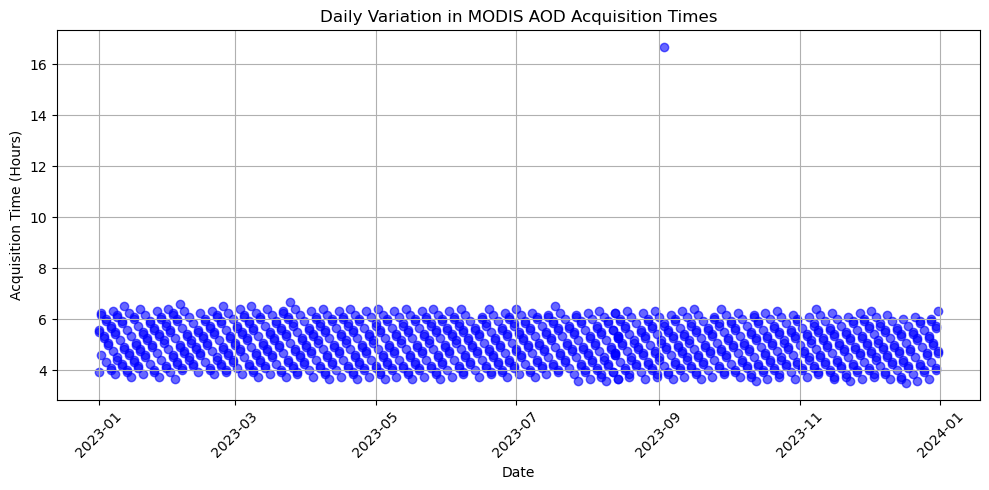

In [16]:
import os
import datetime
import matplotlib.pyplot as plt
from osgeo import gdal

# Define the folder path
folder_path = r"C:\SushrutK\2023MAIAC\MCD19A2_061-20250103_131352"

# List all HDF files in the folder
hdf_files = [f for f in os.listdir(folder_path) if f.endswith(".hdf")]

# Lists to store extracted date-time values
dates = []
times = []

# Iterate through each HDF file
for hdf_file in hdf_files:
    file_path = os.path.join(folder_path, hdf_file)
    
    # Open the HDF file
    dataset = gdal.Open(file_path)
    
    if dataset:
        metadata = dataset.GetMetadata()
        
        # Extract acquisition times
        start_times = metadata.get("GRANULEBEGINNINGDATETIME", "").split(", ")
        
        for time_str in start_times:
            if time_str:  # Ignore empty values
                dt = datetime.datetime.fromisoformat(time_str.replace("Z", ""))  # Convert to datetime
                dates.append(dt.date())  # Store only the date
                times.append(dt.time())  # Store only the time
    
    dataset = None  # Close the dataset

# Convert time values into hours for plotting
time_hours = [t.hour + t.minute / 60.0 for t in times]

# Plot the data
plt.figure(figsize=(10, 5))
plt.scatter(dates, time_hours, color='blue', alpha=0.6)

# Formatting the plot
plt.xlabel("Date")
plt.ylabel("Acquisition Time (Hours)")
plt.title("Daily Variation in MODIS AOD Acquisition Times")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


# Extracting Time of Aquisition in IST

In [18]:
import os
import datetime
import pandas as pd
from osgeo import gdal

# Define the folder path
folder_path = r"C:\SushrutK\2023MAIAC\MCD19A2_061-20250103_131352"

# List all HDF files in the folder
hdf_files = [f for f in os.listdir(folder_path) if f.endswith(".hdf")]

# Lists to store extracted data
data_list = []

# Iterate through each HDF file
for hdf_file in hdf_files:
    file_path = os.path.join(folder_path, hdf_file)
    
    # Open the HDF file
    dataset = gdal.Open(file_path)
    
    if dataset:
        metadata = dataset.GetMetadata()
        
        # Extract acquisition times
        start_times = metadata.get("GRANULEBEGINNINGDATETIME", "").split(", ")
        
        for time_str in start_times:
            if time_str:  # Ignore empty values
                dt = datetime.datetime.fromisoformat(time_str.replace("Z", ""))  # Convert to datetime
                data_list.append([dt.date(), dt.time()])  # Append as [Date, Time]
    
    dataset = None  # Close the dataset

# Convert list to DataFrame
df = pd.DataFrame(data_list, columns=["Date", "Acquisition Time"])

# Define Excel file path
excel_file = os.path.join(folder_path, "MODIS_Acquisition_Times.xlsx")

# Save DataFrame to Excel
df.to_excel(excel_file, index=False)

print(f"Excel file saved at: {excel_file}")


Excel file saved at: C:\SushrutK\2023MAIAC\MCD19A2_061-20250103_131352\MODIS_Acquisition_Times.xlsx


In [20]:
import os
import datetime
import pandas as pd
from osgeo import gdal

# Define the folder path
folder_path = r"C:\SushrutK\2023MAIAC\MCD19A2_061-20250103_131352"

# List all HDF files in the folder
hdf_files = [f for f in os.listdir(folder_path) if f.endswith(".hdf")]

# Lists to store extracted data
data_list = []

# Time difference: UTC to IST (+5:30)
time_offset = datetime.timedelta(hours=5, minutes=30)

# Iterate through each HDF file
for hdf_file in hdf_files:
    file_path = os.path.join(folder_path, hdf_file)
    
    # Open the HDF file
    dataset = gdal.Open(file_path)
    
    if dataset:
        metadata = dataset.GetMetadata()
        
        # Extract acquisition times
        start_times = metadata.get("GRANULEBEGINNINGDATETIME", "").split(", ")
        
        for time_str in start_times:
            if time_str:  # Ignore empty values
                dt_utc = datetime.datetime.fromisoformat(time_str.replace("Z", ""))  # Convert to UTC datetime
                dt_ist = dt_utc + time_offset  # Convert to IST
                
                data_list.append([dt_ist.date(), dt_ist.time()])  # Append as [Date, IST Time]
    
    dataset = None  # Close the dataset

# Convert list to DataFrame
df = pd.DataFrame(data_list, columns=["Date", "Acquisition Time (IST)"])

# Define Excel file path
excel_file = os.path.join(folder_path, "MODIS_Acquisition_Times_IST.xlsx")

# Save DataFrame to Excel
df.to_excel(excel_file, index=False)

print(f"Excel file saved at: {excel_file}")


Excel file saved at: C:\SushrutK\2023MAIAC\MCD19A2_061-20250103_131352\MODIS_Acquisition_Times_IST.xlsx


In [22]:
import os
from osgeo import gdal

# Define the file path
file_path = r"C:\SushrutK\2020\Optical_Depth\MCD19A2.A2020001.mosaic.061.2025035084156.psrp_000502329232.Optical_Depth_047_1-Optical_Depth_047.tif"

# Open the GeoTIFF file
dataset = gdal.Open(file_path)

# Check if the file is opened successfully
if dataset:
    # Get metadata
    metadata = dataset.GetMetadata()
    
    # Print metadata
    print("Metadata:")
    for key, value in metadata.items():
        print(f"{key}: {value}")
    
    # Get raster size
    print("\nRaster Dimensions:")
    print(f"  Width: {dataset.RasterXSize} pixels")
    print(f"  Height: {dataset.RasterYSize} pixels")
    
    # Get projection details
    print("\nProjection Information:")
    print(dataset.GetProjection())

    # Get geotransform (spatial extent)
    geotransform = dataset.GetGeoTransform()
    print("\nGeoTransform (Spatial Extent):")
    print(f"  Top Left X: {geotransform[0]}")
    print(f"  Pixel Width: {geotransform[1]}")
    print(f"  Rotation (X): {geotransform[2]}")
    print(f"  Top Left Y: {geotransform[3]}")
    print(f"  Rotation (Y): {geotransform[4]}")
    print(f"  Pixel Height: {geotransform[5]}")
    
    # Get number of bands
    print("\nNumber of Bands:", dataset.RasterCount)
    
    # Close dataset
    dataset = None
else:
    print("Error: Could not open the file.")


Metadata:
AREA_OR_POINT: Point
TIFFTAG_IMAGEDESCRIPTION: Optical_Depth_047
TIFFTAG_RESOLUTIONUNIT: 1 (unitless)
TIFFTAG_SOFTWARE: lndgeot v1.0

Raster Dimensions:
  Width: 710 pixels
  Height: 1197 pixels

Projection Information:
PROJCS["WGS 84 / UTM zone 44N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",81],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32644"]]

GeoTransform (Spatial Extent):
  Top Left X: 171073.562983
  Pixel Width: 926.3744415633804
  Rotation (X): 0.0
  Top Left Y: 2214294.026127
  Rotation (Y): 0.0
  Pixel Height: -926.1731558613199


In [24]:
import subprocess

# Define the file path
file_path = r"C:\SushrutK\2020\Optical_Depth\MCD19A2.A2020001.mosaic.061.2025035084156.psrp_000502329232.Optical_Depth_047_1-Optical_Depth_047.tif"

# Run gdalinfo command to get full metadata
try:
    result = subprocess.run(["gdalinfo", file_path], capture_output=True, text=True, check=True)
    print(result.stdout)  # Print metadata
except subprocess.CalledProcessError as e:
    print("Error:", e)


Driver: GTiff/GeoTIFF
Files: C:\SushrutK\2020\Optical_Depth\MCD19A2.A2020001.mosaic.061.2025035084156.psrp_000502329232.Optical_Depth_047_1-Optical_Depth_047.tif
Size is 710, 1197
Coordinate System is:
PROJCRS["WGS 84 / UTM zone 44N",
    BASEGEOGCRS["WGS 84",
        DATUM["World Geodetic System 1984",
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4326]],
    CONVERSION["Transverse Mercator",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8801]],
        PARAMETER["Longitude of natural origin",81,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["Scale factor at natural origin",0.9996,
            SCALEUNIT["unity",1],
            ID["EPSG",8805

In [28]:
import os
import pandas as pd
from osgeo import gdal
from datetime import datetime, timedelta

# Define the folder path
folder_path = r"C:\SushrutK\2023MAIAC\MCD19A2_061-20250103_131352"

# List all HDF files in the folder
hdf_files = [f for f in os.listdir(folder_path) if f.endswith(".hdf")]

# Initialize a list to store extracted data
data = []

# Function to convert UTC to IST
def convert_utc_to_ist(utc_time):
    try:
        utc_dt = datetime.strptime(utc_time, "%Y-%m-%dT%H:%M:%S.%fZ")
        ist_dt = utc_dt + timedelta(hours=5, minutes=30)  # Convert to IST
        return ist_dt.strftime("%Y-%m-%d %H:%M:%S")  # Format for Excel
    except Exception:
        return "N/A"  # If conversion fails

# Iterate through each HDF file
for hdf_file in hdf_files:
    file_path = os.path.join(folder_path, hdf_file)
    
    # Open the HDF file
    dataset = gdal.Open(file_path)
    
    if dataset:
        metadata = dataset.GetMetadata()
        
        # Extract times
        granule_start_time = metadata.get("GRANULEBEGINNINGDATETIME", "N/A")
        granule_end_time = metadata.get("GRANULEENDINGDATETIME", "N/A")
        range_start_time = metadata.get("RANGEBEGINNINGTIME", "N/A")
        range_end_time = metadata.get("RANGEENDINGTIME", "N/A")
        
        # Convert times to IST
        granule_start_ist = convert_utc_to_ist(granule_start_time.split(",")[0]) if granule_start_time != "N/A" else "N/A"
        granule_end_ist = convert_utc_to_ist(granule_end_time.split(",")[0]) if granule_end_time != "N/A" else "N/A"
        range_start_ist = convert_utc_to_ist(f"2023-01-01T{range_start_time}") if range_start_time != "N/A" else "N/A"
        range_end_ist = convert_utc_to_ist(f"2023-01-01T{range_end_time}") if range_end_time != "N/A" else "N/A"

        # Append to data list
        data.append([hdf_file, granule_start_ist, granule_end_ist, range_start_ist, range_end_ist])

    dataset = None  # Close the dataset

# Create DataFrame and save to Excel
df = pd.DataFrame(data, columns=["File Name", "Granule Start (IST)", "Granule End (IST)", "Range Start (IST)", "Range End (IST)"])
output_excel = os.path.join(folder_path, "AOD_Acquisition_Times.xlsx")
df.to_excel(output_excel, index=False)

print(f"Metadata saved to {output_excel}")


Metadata saved to C:\SushrutK\2023MAIAC\MCD19A2_061-20250103_131352\AOD_Acquisition_Times.xlsx


# Merged Each Year's Data to a Single File for each Location

In [30]:
import os
import pandas as pd
import glob

# Folder containing the CSV files
data_folder = r"C:\Users\Administrator\Downloads\1hrdata"

# Get all CSV files
csv_files = glob.glob(os.path.join(data_folder, "*.csv"))

# Dictionary to group files by location
location_files = {}

# Group files based on location
for file in csv_files:
    # Extract location name from filename (assuming format: "Raw_data_1Hr_YEAR_site_ID_Location_Hyderabad_TSPCB_1Hr.csv")
    parts = os.path.basename(file).split("_")
    location_name = "_".join(parts[5:-2])  # Extract only location name
    if location_name not in location_files:
        location_files[location_name] = []
    location_files[location_name].append(file)

# Merge and save for each location
output_folder = os.path.join(data_folder, "Merged_Locations")
os.makedirs(output_folder, exist_ok=True)

for location, files in location_files.items():
    data_list = []
    for file in sorted(files):  # Sorting ensures chronological order
        df = pd.read_csv(file)
        data_list.append(df)

    # Concatenate all years' data for the location
    merged_df = pd.concat(data_list, ignore_index=True)

    # Save merged file
    output_file = os.path.join(output_folder, f"Merged_{location}.csv")
    merged_df.to_csv(output_file, index=False)
    print(f"Merged data saved: {output_file}")

print("All locations merged successfully!")


Merged data saved: C:\Users\Administrator\Downloads\1hrdata\Merged_Locations\Merged_199_Bollaram_Industrial_Area_Hyderabad.csv
Merged data saved: C:\Users\Administrator\Downloads\1hrdata\Merged_Locations\Merged_251_ICRISAT_Patancheru_Hyderabad.csv
Merged data saved: C:\Users\Administrator\Downloads\1hrdata\Merged_Locations\Merged_262_Central_University_Hyderabad.csv
Merged data saved: C:\Users\Administrator\Downloads\1hrdata\Merged_Locations\Merged_275_IDA_Pashamylaram_Hyderabad.csv
Merged data saved: C:\Users\Administrator\Downloads\1hrdata\Merged_Locations\Merged_294_Sanathnagar_Hyderabad.csv
Merged data saved: C:\Users\Administrator\Downloads\1hrdata\Merged_Locations\Merged_298_Zoo_Park_Hyderabad.csv
Merged data saved: C:\Users\Administrator\Downloads\1hrdata\Merged_Locations\Merged_5595_New_Malakpet_Hyderabad.csv
Merged data saved: C:\Users\Administrator\Downloads\1hrdata\Merged_Locations\Merged_5596_ECIL_Kapra_Hyderabad.csv
Merged data saved: C:\Users\Administrator\Downloads\1hrda

In [42]:
df = pd.read_csv(file)
print(df.columns)  # Check available column names


df['Timestamp'] = pd.to_datetime(df['Timestamp'])


Index(['Timestamp', 'PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)',
       'NO2 (µg/m³)', 'NOx (ppb)', 'NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)',
       'Ozone (µg/m³)', 'Benzene (µg/m³)', 'Toluene (µg/m³)', 'Xylene (µg/m³)',
       'O Xylene (µg/m³)', 'Eth-Benzene (µg/m³)', 'MP-Xylene (µg/m³)',
       'AT (°C)', 'RH (%)', 'WS (m/s)', 'WD (deg)', 'RF (mm)', 'TOT-RF (mm)',
       'SR (W/mt2)', 'BP (mmHg)', 'VWS (m/s)'],
      dtype='object')


# Filtering 9 AM to 12 PM data and Getting its Mean

In [46]:
import os
import pandas as pd
import glob

merged_folder = r"C:\Users\Administrator\Downloads\1hrdata\Merged_Locations"
output_folder = os.path.join(merged_folder, "Filtered_9AM_12PM")
os.makedirs(output_folder, exist_ok=True)

csv_files = glob.glob(os.path.join(merged_folder, "Merged_*.csv"))

for file in csv_files:
    df = pd.read_csv(file)

    # Strip column names of spaces
    df.columns = df.columns.str.strip()

    # Print columns to check actual names
    print(f"Processing {file}: Columns -> {df.columns}")

    # Identify the correct datetime column
    datetime_col = None
    for col in df.columns:
        if "date" in col.lower() or "time" in col.lower():
            datetime_col = col
            break

    if datetime_col is None:
        print(f"⚠️ No datetime column found in {file}. Skipping.")
        continue

    # Convert to datetime
    df[datetime_col] = pd.to_datetime(df[datetime_col])

    # Filter data from 9 AM to 12 PM
    df_filtered = df[(df[datetime_col].dt.hour >= 9) & (df[datetime_col].dt.hour < 12)]

    # Compute daily mean
    df_mean = df_filtered.groupby(df_filtered[datetime_col].dt.date).mean()

    # Reset index and rename correctly
    df_mean.index.name = "Date"  # Set index name
    df_mean.reset_index(inplace=True)  # Reset index

    # Save file
    output_file = os.path.join(output_folder, f"Filtered_{os.path.basename(file)}")
    df_mean.to_csv(output_file, index=False)
    print(f"✅ Processed file saved: {output_file}")

print("🚀 Processing complete!")


Processing C:\Users\Administrator\Downloads\1hrdata\Merged_Locations\Merged_199_Bollaram_Industrial_Area_Hyderabad.csv: Columns -> Index(['Timestamp', 'PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)',
       'NO2 (µg/m³)', 'NOx (ppb)', 'NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)',
       'Ozone (µg/m³)', 'Benzene (µg/m³)', 'Toluene (µg/m³)', 'Xylene (µg/m³)',
       'O Xylene (µg/m³)', 'Eth-Benzene (µg/m³)', 'MP-Xylene (µg/m³)',
       'AT (°C)', 'RH (%)', 'WS (m/s)', 'WD (deg)', 'RF (mm)', 'TOT-RF (mm)',
       'SR (W/mt2)', 'BP (mmHg)', 'VWS (m/s)'],
      dtype='object')
✅ Processed file saved: C:\Users\Administrator\Downloads\1hrdata\Merged_Locations\Filtered_9AM_12PM\Filtered_Merged_199_Bollaram_Industrial_Area_Hyderabad.csv
Processing C:\Users\Administrator\Downloads\1hrdata\Merged_Locations\Merged_251_ICRISAT_Patancheru_Hyderabad.csv: Columns -> Index(['Timestamp', 'PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)',
       'NO2 (µg/m³)', 'NOx (ppb)', 'NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/

In [48]:
import pandas as pd

# Load the original and processed file
original_file = r"C:\Users\Administrator\Downloads\1hrdata\Merged_Locations\Merged_199_Bollaram_Industrial_Area_Hyderabad.csv"
filtered_file = r"C:\Users\Administrator\Downloads\1hrdata\Merged_Locations\Filtered_9AM_12PM\Filtered_Merged_199_Bollaram_Industrial_Area_Hyderabad.csv"

df_original = pd.read_csv(original_file)
df_filtered = pd.read_csv(filtered_file)

# Convert Timestamp column to datetime (modify column name if needed)
df_original["Timestamp"] = pd.to_datetime(df_original["Timestamp"])

# Manually filter the original data from 9 AM to 12 PM for a specific day (e.g., '2024-01-15')
date_to_check = "2024-01-15"
df_check = df_original[(df_original["Timestamp"].dt.hour >= 9) & (df_original["Timestamp"].dt.hour < 12)]
df_check = df_check[df_check["Timestamp"].dt.date == pd.to_datetime(date_to_check).date()]

# Compute manual mean
manual_mean = df_check.mean()

# Compare with processed data
processed_mean = df_filtered[df_filtered["Date"] == date_to_check]

print("🔹 Manual Mean Calculation:\n", manual_mean)
print("\n🔹 Processed Data from Filtered File:\n", processed_mean)


🔹 Manual Mean Calculation:
 Timestamp              2024-01-15 10:00:00
PM2.5 (µg/m³)                    78.526667
PM10 (µg/m³)                        129.75
NO (µg/m³)                            2.77
NO2 (µg/m³)                          20.93
NOx (ppb)                            13.39
NH3 (µg/m³)                      14.916667
SO2 (µg/m³)                          19.21
CO (mg/m³)                        0.926667
Ozone (µg/m³)                    37.693333
Benzene (µg/m³)                        0.6
Toluene (µg/m³)                   2.166667
Xylene (µg/m³)                    1.656667
O Xylene (µg/m³)                       NaN
Eth-Benzene (µg/m³)                    NaN
MP-Xylene (µg/m³)                      NaN
AT (°C)                          27.216667
RH (%)                           57.166667
WS (m/s)                             0.135
WD (deg)                        233.333333
RF (mm)                                NaN
TOT-RF (mm)                            0.0
SR (W/mt2)                

# Filtering Out Unnnecessary Parameters

In [50]:
import os
import pandas as pd
import glob

# Define input and output folder paths
filtered_folder = r"C:\SushrutK\1hrdata\Merged_Locations\Filtered_9AM_12PM"
output_folder = os.path.join(filtered_folder, "Processed_Files")
os.makedirs(output_folder, exist_ok=True)

# Get all filtered CSV files
csv_files = glob.glob(os.path.join(filtered_folder, "Filtered_*.csv"))

for file in csv_files:
    df = pd.read_csv(file)

    # Print column names to check
    print(f"Processing {file}: Columns -> {list(df.columns)}")

    # Drop columns E to Q (Excel-style indexing -> 5th to 17th column in Python index)
    if len(df.columns) >= 17:  # Ensure we have enough columns
        df = df.drop(df.columns[4:17], axis=1)  # Drop columns 5th (E) to 17th (Q)

    # Save the processed file
    output_file = os.path.join(output_folder, f"Processed_{os.path.basename(file)}")
    df.to_csv(output_file, index=False)
    print(f"✅ Processed file saved: {output_file}")

print("🚀 Processing complete!")


Processing C:\SushrutK\1hrdata\Merged_Locations\Filtered_9AM_12PM\Filtered_Merged_199_Bollaram_Industrial_Area_Hyderabad.csv: Columns -> ['Date', 'Timestamp', 'PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)', 'NO2 (µg/m³)', 'NOx (ppb)', 'NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)', 'Ozone (µg/m³)', 'Benzene (µg/m³)', 'Toluene (µg/m³)', 'Xylene (µg/m³)', 'O Xylene (µg/m³)', 'Eth-Benzene (µg/m³)', 'MP-Xylene (µg/m³)', 'AT (°C)', 'RH (%)', 'WS (m/s)', 'WD (deg)', 'RF (mm)', 'TOT-RF (mm)', 'SR (W/mt2)', 'BP (mmHg)', 'VWS (m/s)']
✅ Processed file saved: C:\SushrutK\1hrdata\Merged_Locations\Filtered_9AM_12PM\Processed_Files\Processed_Filtered_Merged_199_Bollaram_Industrial_Area_Hyderabad.csv
Processing C:\SushrutK\1hrdata\Merged_Locations\Filtered_9AM_12PM\Filtered_Merged_251_ICRISAT_Patancheru_Hyderabad.csv: Columns -> ['Date', 'Timestamp', 'PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)', 'NO2 (µg/m³)', 'NOx (ppb)', 'NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)', 'Ozone (µg/m³)', 'Benzene (µg/m³)', 'T

# Filtering Out Dates that are not required

In [52]:
import os
import pandas as pd
import glob

# Define file paths
processed_folder = r"C:\SushrutK\1hrdata\Merged_Locations\Filtered_9AM_12PM\Processed_Files"
output_folder = os.path.join(processed_folder, "Filtered_By_Dates")
os.makedirs(output_folder, exist_ok=True)

# Load extracted dates from Excel file
dates_file = r"C:\Users\Administrator\Downloads\extracted_dates.xlsx"
df_dates = pd.read_excel(dates_file, usecols=["Dates"])

# Convert 'Dates' column to datetime format
df_dates["Dates"] = pd.to_datetime(df_dates["Dates"]).dt.date
extracted_dates = set(df_dates["Dates"])

# Get all processed CSV files
csv_files = glob.glob(os.path.join(processed_folder, "Processed_*.csv"))

for file in csv_files:
    df = pd.read_csv(file)

    # Convert 'Date' column to datetime format
    df["Date"] = pd.to_datetime(df["Date"], errors="coerce").dt.date

    # Filter rows where 'Date' is in the extracted_dates set
    df_filtered = df[df["Date"].isin(extracted_dates)]

    # Save the filtered data
    output_file = os.path.join(output_folder, f"Filtered_{os.path.basename(file)}")
    df_filtered.to_csv(output_file, index=False)
    print(f"✅ Filtered file saved: {output_file}")

print("🚀 Date filtering complete!")


✅ Filtered file saved: C:\SushrutK\1hrdata\Merged_Locations\Filtered_9AM_12PM\Processed_Files\Filtered_By_Dates\Filtered_Processed_Filtered_Merged_199_Bollaram_Industrial_Area_Hyderabad.csv
✅ Filtered file saved: C:\SushrutK\1hrdata\Merged_Locations\Filtered_9AM_12PM\Processed_Files\Filtered_By_Dates\Filtered_Processed_Filtered_Merged_251_ICRISAT_Patancheru_Hyderabad.csv
✅ Filtered file saved: C:\SushrutK\1hrdata\Merged_Locations\Filtered_9AM_12PM\Processed_Files\Filtered_By_Dates\Filtered_Processed_Filtered_Merged_262_Central_University_Hyderabad.csv
✅ Filtered file saved: C:\SushrutK\1hrdata\Merged_Locations\Filtered_9AM_12PM\Processed_Files\Filtered_By_Dates\Filtered_Processed_Filtered_Merged_275_IDA_Pashamylaram_Hyderabad.csv
✅ Filtered file saved: C:\SushrutK\1hrdata\Merged_Locations\Filtered_9AM_12PM\Processed_Files\Filtered_By_Dates\Filtered_Processed_Filtered_Merged_294_Sanathnagar_Hyderabad.csv
✅ Filtered file saved: C:\SushrutK\1hrdata\Merged_Locations\Filtered_9AM_12PM\Proce

# Random Forest Regression Model ("PM10 (Âµg/mÂ³)",

Model Performance:
R² Score: 0.7761
Root Mean Squared Error (RMSE): 9.4070


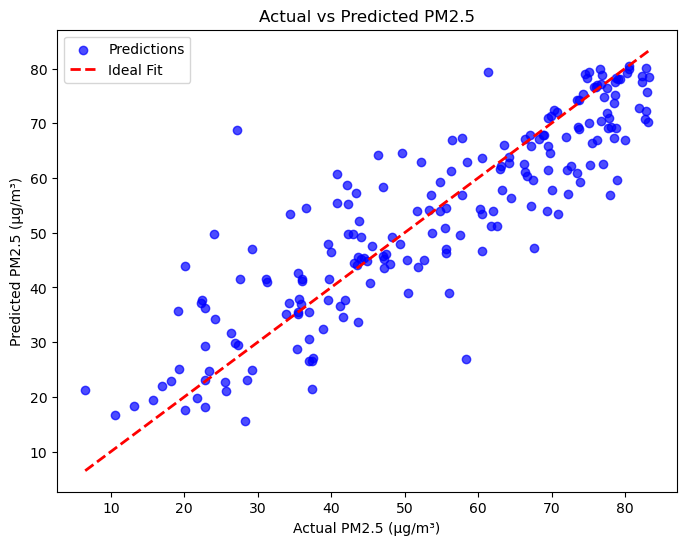

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Load the dataset
file_path = r"C:\SushrutK\AOD_Met_parameters_6-3-25.xlsx"
df = pd.read_excel(file_path)

# Selecting relevant features and target variable
features = ["AOD", "PM10 (Âµg/mÂ³)","AT (Â°C)", "RH (%)", "WS (m/s)", "WD (deg)", "SR (W/mt2)", "BP (mmHg)"]
target = "PM2.5 (Âµg/mÂ³)"

# Drop rows with missing values
df = df.dropna(subset=[target])  # Ensure target variable has no missing values
df = df.dropna(subset=features)  # Ensure feature columns have no missing values

# Splitting data into train and test sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Model Performance:")
print(f"R² Score: {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Plot actual vs predicted PM2.5 values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue", label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Ideal Fit")
plt.xlabel("Actual PM2.5 (µg/m³)")
plt.ylabel("Predicted PM2.5 (µg/m³)")
plt.title("Actual vs Predicted PM2.5")
plt.legend()
plt.show()


# XGBoost

In [79]:
!pip install xgboost


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
    --------------------------------------- 1.6/124.9 MB 10.5 MB/s eta 0:00:12
   - -------------------------------------- 4.2/124.9 MB 11.5 MB/s eta 0:00:11
   -- ------------------------------------- 6.8/124.9 MB 11.7 MB/s eta 0:00:11
   -- ------------------------------------- 9.2/124.9 MB 11.7 MB/s eta 0:00:10
   --- ------------------------------------ 11.5/124.9 MB 11.6 MB/s eta 0:00:10
   ---- ----------------------------------- 14.2/124.9 MB 11.7 MB/s eta 0:00:10
   ----- ---------------------------------- 16.5/124.9 MB 11.7 MB/s eta 0:00:10
   ------ --------------------------------- 19.1/124.9 MB 11.7 MB/s eta 0:00:10
   ------ --------------------------------- 21.8/124.9 MB 11.8 MB/s eta 0:00:09
   ------- -------------------------------- 24.1/124.9 MB 11.7 MB/s eta 0:00:09
   -------- ------------------------------- 26.5/124.9 MB 11.7 MB/s eta 0:00:09
   --------- ------------------------------ 28.8/124.

In [116]:
from xgboost import XGBRegressor

# Initialize the model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Model evaluation
r2_xgb = r2_score(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print("XGBoost Results:")
print(f"R² Score: {r2_xgb:.4f}")
print(f"RMSE: {rmse_xgb:.4f}")



XGBoost Results:
R² Score: 0.7904
RMSE: 9.1008


# Support Vector Regressor (SVR)

In [118]:
from sklearn.svm import SVR

# Initialize the model
svr_model = SVR(kernel="rbf")
svr_model.fit(X_train, y_train)

# Predictions
y_pred_svr = svr_model.predict(X_test)

# Model evaluation
r2_svr = r2_score(y_test, y_pred_svr)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))

print("SVR Results:")
print(f"R² Score: {r2_svr:.4f}")
print(f"RMSE: {rmse_svr:.4f}")


SVR Results:
R² Score: 0.3056
RMSE: 16.5668


# KNN

In [120]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize the model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_model.predict(X_test)

# Model evaluation
r2_knn = r2_score(y_test, y_pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))

print("KNN Results:")
print(f"R² Score: {r2_knn:.4f}")
print(f"RMSE: {rmse_knn:.4f}")


KNN Results:
R² Score: 0.7003
RMSE: 10.8830


# Correlation Matrix

Correlation Matrix:
                       AOD  PM2.5 (Âµg/mÂ³)  PM10 (Âµg/mÂ³)  AT (Â°C)  \
AOD              1.000000         0.098597        0.083206  0.170064   
PM2.5 (Âµg/mÂ³)  0.098597         1.000000        0.792124 -0.173125   
PM10 (Âµg/mÂ³)   0.083206         0.792124        1.000000 -0.086905   
AT (Â°C)         0.170064        -0.173125       -0.086905  1.000000   
RH (%)           0.075307         0.231071        0.001247 -0.208340   
WS (m/s)         0.056055        -0.199177       -0.121406 -0.046282   
WD (deg)         0.061558        -0.206842       -0.207379  0.066271   
SR (W/mt2)      -0.072935        -0.267722       -0.190183  0.097594   
BP (mmHg)       -0.154867         0.107902        0.043989  0.147440   
Unnamed: 11     -0.061196        -0.338957       -0.362605 -0.116379   
Unnamed: 12           NaN              NaN             NaN       NaN   
Unnamed: 13           NaN              NaN             NaN       NaN   
Unnamed: 14           NaN              NaN 

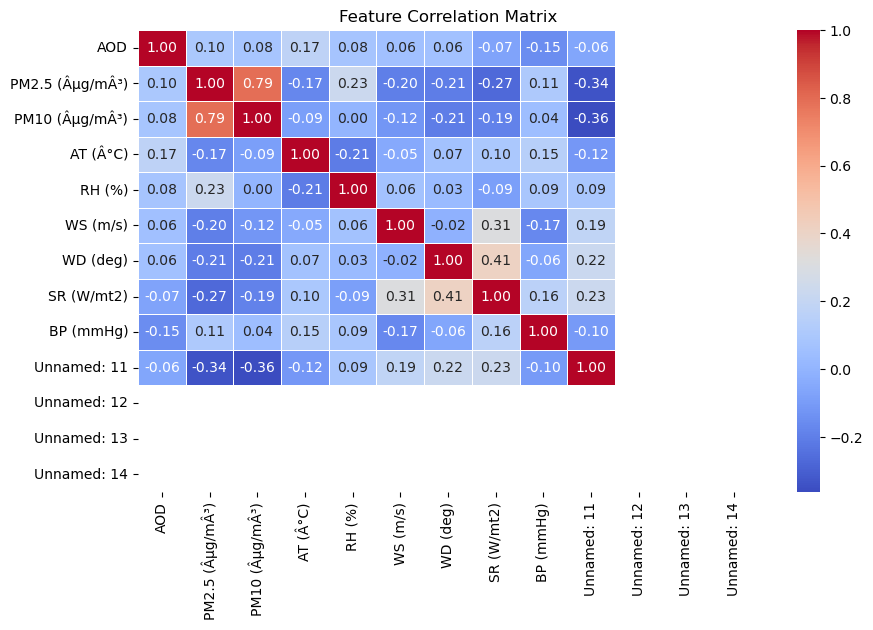

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=['number'])  # Keep only numerical data

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Print the correlation matrix
print("Correlation Matrix:\n", corr_matrix)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()
